In [292]:
# importing libraries related to data manipulation
import pandas as pd
import numpy as np 
import klib
#  for visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

# importing libraries related to classification models
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


# metrics related packages
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score



# for data preprocessing
from sklearn.preprocessing import StandardScaler

#  ignore warmings
import warnings
warnings.filterwarnings('ignore')

#  to indicate progress
from tqdm import tqdm

In [ ]:
XGBClassifier,LGBMClassifier,CatBoostClassifier
'XGBClassifier','LGBMClassifier','CatBoostClassifier'

In [293]:
class Model_Selector:
    '''this class help to select
    suitable model for given data frame.
    the models used are
    a) Logistic regression
    b)KNN classifier
    c)Decision tree
    d)Random forest
    e)Adaboostclassifier
    f)gradient boost classifier
    g)xgboost classifier
    h) Lighgbm
    i)catboost'''

    def __init__(self):
        self.model_used=[LogisticRegression,KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier,
        AdaBoostClassifier,GradientBoostingClassifier,XGBClassifier,LGBMClassifier,CatBoostClassifier]
        self.model_names=['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier',
                         'AdaBoostClassifier','GradientBoostingClassifier','XGBClassifier','LGBMClassifier','CatBoostClassifier']
    
    
    def model_performances(self,dataframe,label,normalize=False):    
       #------Defining X and y------
        x=dataframe.drop(label,axis=1)
        y=dataframe[label]
        
        
       # -------splitting data-------
        x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.3,random_state=42)
       
    #  scaling the data if normalize=True 
        if normalize==True:
            scale=StandardScaler()
            scale.fit(x_train)
            x_train_scaled=scale.transform(x_train)
            x_test_scaled=scale.transform(x_test)
        
        else:
            pass
        
       #------- Data frmale of model performance---------
        model_performance=pd.DataFrame({'model_name':[],'accuracy':[],'Precision score':[],'Recall score':[],'f1_score':[]})
        
       #--------- fitting different models---------
        ind=0
        for Model in tqdm(self.model_used):
            model=Model()
            model.fit(x_train.values,y_train)
            y_pred=model.predict(x_test.values)
            if y.nunique()==2:
                accuracy=model.score(y_test,y_pred)
                precision=precision_score(y_test,y_pred)
                recall=recall_score(y_test,y_pred)
                f1=f1_score(y_test,y_pred)
            elif y.nunique()>2:
                accuracy=accuracy_score(y_test,y_pred)
                precision=precision_score(y_test,y_pred,average='weighted')
                recall=recall_score(y_test,y_pred,average='weighted')
                f1=f1_score(y_test,y_pred,average='weighted')
                
            model_performance.loc[ind]=[self.model_names[ind],accuracy,precision,recall,f1]
            print(self.model_names[ind],'model fitted')
            ind+=1
        
        self.model_performance=model_performance
        return model_performance.style.highlight_max(subset = model_performance.columns[1:],
                       color = 'lightgreen', axis = 0)
    
    
    def select_best_model(self,based_on='accuracy'):
        '''based_on=['accuracy','Precision score','Recall score','f1_score']'''
        self.best_model_ind=self.model_performance[self.model_performance[based_on]==self.model_performance[based_on].max()].index[0]
        return self.model_names[self.best_model_ind]
            
        
    def plot_model_performance(self):
        self.model_performance.plot(figsize=(20,8),marker='o')
        plt.xticks(range(len(self.model_performance)),self.model_performance['model_name'].values)
        plt.xticks(rotation=45)
        plt.show()


        
            
        
            
        
        
    

In [245]:
#  sample data from seaborn
d=sns.load_dataset('iris')
d.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [246]:
d.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [247]:
d=klib.convert_datatypes(d)

In [248]:
d.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [249]:
d.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [250]:
d[d['sepal_length']==d['sepal_length'].max()].index[0]

131

In [251]:
d['species'].unique()

['setosa', 'versicolor', 'virginica']
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [252]:
d['species']=d['species'].map({'setosa':0,'versicolor':1,'virginica':2})
d.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


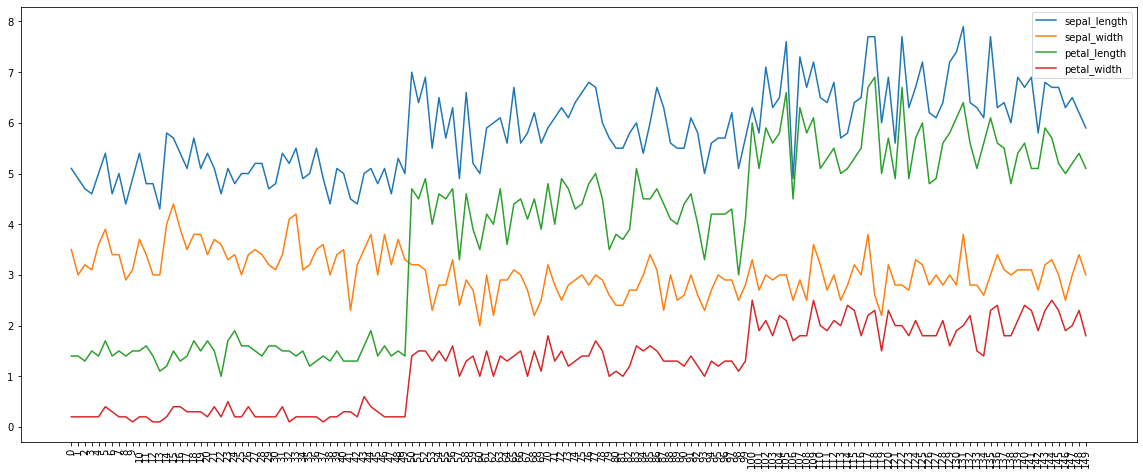

In [253]:
# plt.figure(
d.plot(figsize=(20,8))
plt.xticks(d.index)
plt.xticks(rotation=90)
plt.show()


In [254]:
d['species']=d['species'].astype(int)

In [255]:
d.dtypes

sepal_length    Float32
sepal_width     Float32
petal_length    Float32
petal_width     Float32
species           int32
dtype: object

In [294]:
m=Model_Selector()
m.model_performances(d,'species',normalize=False)

<IPython.core.display.Javascript object>

  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

LogisticRegression model fitted
KNeighborsClassifier model fitted
DecisionTreeClassifier model fitted


 44%|█████████████████████████████████████▎                                              | 4/9 [00:00<00:00, 12.21it/s]

RandomForestClassifier model fitted
AdaBoostClassifier model fitted


 78%|█████████████████████████████████████████████████████████████████▎                  | 7/9 [00:00<00:00,  7.52it/s]

GradientBoostingClassifier model fitted
[00:02:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier model fitted
LGBMClassifier model fitted
Learning rate set to 0.070535
0:	learn: 1.0227224	total: 1.92ms	remaining: 1.92s
1:	learn: 0.9670790	total: 3.57ms	remaining: 1.78s
2:	learn: 0.9093192	total: 5.48ms	remaining: 1.82s
3:	learn: 0.8476036	total: 7.32ms	remaining: 1.82s
4:	learn: 0.7936124	total: 8.36ms	remaining: 1.66s
5:	learn: 0.7419744	total: 10.2ms	remaining: 1.68s
6:	learn: 0.6998459	total: 11.9ms	remaining: 1.69s
7:	learn: 0.6653541	total: 13.7ms	remaining: 1.7s
8:	learn: 0.6292865	total: 15.6ms	remaining: 1.72s
9:	learn: 0.5960485	total: 17.5ms	remaining: 1.73s
10:	learn: 0.5611980	total: 18.8ms	remaining: 1.69s
11:

248:	learn: 0.0215572	total: 277ms	remaining: 837ms
249:	learn: 0.0214376	total: 278ms	remaining: 835ms
250:	learn: 0.0213663	total: 279ms	remaining: 833ms
251:	learn: 0.0212568	total: 280ms	remaining: 831ms
252:	learn: 0.0211777	total: 281ms	remaining: 829ms
253:	learn: 0.0210675	total: 282ms	remaining: 827ms
254:	learn: 0.0209677	total: 282ms	remaining: 825ms
255:	learn: 0.0208673	total: 283ms	remaining: 823ms
256:	learn: 0.0207624	total: 284ms	remaining: 821ms
257:	learn: 0.0206638	total: 285ms	remaining: 819ms
258:	learn: 0.0205891	total: 286ms	remaining: 817ms
259:	learn: 0.0204543	total: 286ms	remaining: 815ms
260:	learn: 0.0203835	total: 287ms	remaining: 813ms
261:	learn: 0.0202863	total: 288ms	remaining: 811ms
262:	learn: 0.0201992	total: 289ms	remaining: 809ms
263:	learn: 0.0201063	total: 289ms	remaining: 807ms
264:	learn: 0.0200276	total: 290ms	remaining: 804ms
265:	learn: 0.0199539	total: 291ms	remaining: 803ms
266:	learn: 0.0198687	total: 292ms	remaining: 801ms
267:	learn: 

442:	learn: 0.0112027	total: 421ms	remaining: 530ms
443:	learn: 0.0111764	total: 422ms	remaining: 529ms
444:	learn: 0.0111467	total: 423ms	remaining: 527ms
445:	learn: 0.0111233	total: 424ms	remaining: 526ms
446:	learn: 0.0110915	total: 424ms	remaining: 525ms
447:	learn: 0.0110648	total: 425ms	remaining: 524ms
448:	learn: 0.0110393	total: 426ms	remaining: 523ms
449:	learn: 0.0110068	total: 427ms	remaining: 522ms
450:	learn: 0.0109779	total: 427ms	remaining: 520ms
451:	learn: 0.0109560	total: 428ms	remaining: 519ms
452:	learn: 0.0109278	total: 429ms	remaining: 518ms
453:	learn: 0.0109103	total: 430ms	remaining: 517ms
454:	learn: 0.0108763	total: 430ms	remaining: 516ms
455:	learn: 0.0108481	total: 431ms	remaining: 514ms
456:	learn: 0.0108215	total: 432ms	remaining: 513ms
457:	learn: 0.0108019	total: 433ms	remaining: 512ms
458:	learn: 0.0107794	total: 433ms	remaining: 511ms
459:	learn: 0.0107504	total: 434ms	remaining: 510ms
460:	learn: 0.0107183	total: 435ms	remaining: 509ms
461:	learn: 

632:	learn: 0.0076098	total: 565ms	remaining: 328ms
633:	learn: 0.0075981	total: 567ms	remaining: 327ms
634:	learn: 0.0075854	total: 568ms	remaining: 326ms
635:	learn: 0.0075735	total: 569ms	remaining: 325ms
636:	learn: 0.0075585	total: 569ms	remaining: 324ms
637:	learn: 0.0075469	total: 570ms	remaining: 324ms
638:	learn: 0.0075345	total: 571ms	remaining: 323ms
639:	learn: 0.0075163	total: 572ms	remaining: 322ms
640:	learn: 0.0075061	total: 573ms	remaining: 321ms
641:	learn: 0.0074885	total: 574ms	remaining: 320ms
642:	learn: 0.0074773	total: 575ms	remaining: 319ms
643:	learn: 0.0074649	total: 576ms	remaining: 318ms
644:	learn: 0.0074448	total: 577ms	remaining: 317ms
645:	learn: 0.0074338	total: 577ms	remaining: 316ms
646:	learn: 0.0074232	total: 579ms	remaining: 316ms
647:	learn: 0.0074110	total: 580ms	remaining: 315ms
648:	learn: 0.0074003	total: 580ms	remaining: 314ms
649:	learn: 0.0073883	total: 581ms	remaining: 313ms
650:	learn: 0.0073790	total: 582ms	remaining: 312ms
651:	learn: 

959:	learn: 0.0049032	total: 846ms	remaining: 35.2ms
960:	learn: 0.0048970	total: 847ms	remaining: 34.4ms
961:	learn: 0.0048933	total: 847ms	remaining: 33.5ms
962:	learn: 0.0048845	total: 848ms	remaining: 32.6ms
963:	learn: 0.0048798	total: 849ms	remaining: 31.7ms
964:	learn: 0.0048758	total: 850ms	remaining: 30.8ms
965:	learn: 0.0048711	total: 850ms	remaining: 29.9ms
966:	learn: 0.0048663	total: 851ms	remaining: 29ms
967:	learn: 0.0048613	total: 852ms	remaining: 28.2ms
968:	learn: 0.0048560	total: 852ms	remaining: 27.3ms
969:	learn: 0.0048512	total: 853ms	remaining: 26.4ms
970:	learn: 0.0048468	total: 854ms	remaining: 25.5ms
971:	learn: 0.0048423	total: 855ms	remaining: 24.6ms
972:	learn: 0.0048378	total: 855ms	remaining: 23.7ms
973:	learn: 0.0048334	total: 856ms	remaining: 22.9ms
974:	learn: 0.0048275	total: 857ms	remaining: 22ms
975:	learn: 0.0048234	total: 858ms	remaining: 21.1ms
976:	learn: 0.0048183	total: 858ms	remaining: 20.2ms
977:	learn: 0.0048110	total: 859ms	remaining: 19.3

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:02<00:00,  3.33it/s]

CatBoostClassifier model fitted


,model_name,accuracy,Precision score,Recall score,f1_score
0,LogisticRegression,0.933333,0.934524,0.933333,0.933259
1,KNeighborsClassifier,0.977778,0.979167,0.977778,0.977753
2,DecisionTreeClassifier,0.911111,0.911111,0.911111,0.911111
3,RandomForestClassifier,0.888889,0.898148,0.888889,0.887767
4,AdaBoostClassifier,0.933333,0.934524,0.933333,0.933259
5,GradientBoostingClassifier,0.933333,0.934524,0.933333,0.933259
6,XGBClassifier,0.933333,0.934524,0.933333,0.933259
7,LGBMClassifier,0.866667,0.870287,0.866667,0.866071
8,CatBoostClassifier,0.888889,0.898148,0.888889,0.887767


In [295]:
m.select_best_model(based_on='f1_score')

'KNeighborsClassifier'

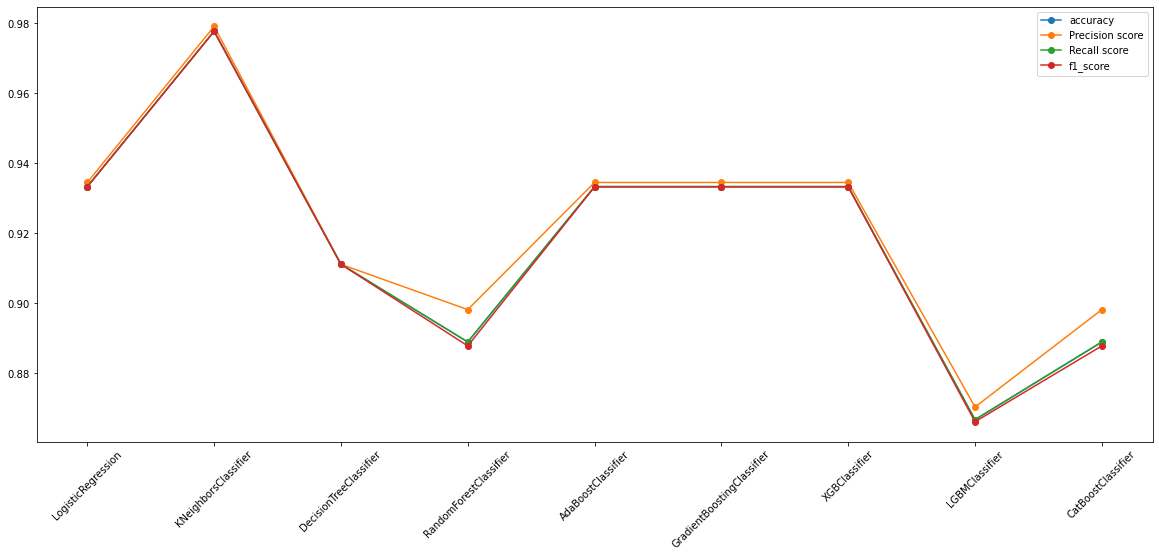

In [296]:
m.plot_model_performance()

In [ ]:
XGBClassifier,LGBMClassifier,CatBoostClassifier

In [ ]:
dataframe=d
label='species'
x=dataframe.drop(label,axis=1)
y=dataframe[label]
 # -------splitting data-------
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.3,random_state=42)

model=LogisticRegression()
model.fit(x_train.values,y_train)
model.score(x_test.values,y_test)

